# Top 250s in IMDB
Исходные данные для анализа взяты с сайта [Kaggle](https://www.kaggle.com/ramjasmaurya/top-250s-in-imdb)

In [515]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [32]:
movies = pd.read_csv('imdb(MOVIES).csv')
movies.head()

,ranking of movie,movie name,Year,certificate,runtime,genre,RATING,DETAIL ABOUT MOVIE,DIRECTOR,ACTOR 1,ACTOR 2,ACTOR 3,ACTOR 4,votes,metascore,GROSS COLLECTION
0,1,Jai Bhim,-2021,TV-MA,164 min,"Crime, Drama",9.4,When a tribal man is arrested for a case of al...,T.J. Gnanavel,Suriya,Lijo Mol Jose,Manikandan,Rajisha Vijayan,163431,NaN,NaN
1,2,The Shawshank Redemption,-1994,R,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2515762,80.0,$28.34M
2,3,The Godfather,-1972,R,175 min,"Crime, Drama",9.2,"The Godfather follows Vito Corleone, Don of th...",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1732749,100.0,$134.97M
3,4,The Dark Knight,-2008,PG-13,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2466041,84.0,$534.86M
4,5,The Godfather: Part II,-1974,R,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1202401,90.0,$57.30M


In [33]:
movies.columns = map(str.title, movies.columns)
movies.head()

,Ranking Of Movie,Movie Name,Year,Certificate,Runtime,Genre,Rating,Detail About Movie,Director,Actor 1,Actor 2,Actor 3,Actor 4,Votes,Metascore,Gross Collection
0,1,Jai Bhim,-2021,TV-MA,164 min,"Crime, Drama",9.4,When a tribal man is arrested for a case of al...,T.J. Gnanavel,Suriya,Lijo Mol Jose,Manikandan,Rajisha Vijayan,163431,NaN,NaN
1,2,The Shawshank Redemption,-1994,R,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2515762,80.0,$28.34M
2,3,The Godfather,-1972,R,175 min,"Crime, Drama",9.2,"The Godfather follows Vito Corleone, Don of th...",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1732749,100.0,$134.97M
3,4,The Dark Knight,-2008,PG-13,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2466041,84.0,$534.86M
4,5,The Godfather: Part II,-1974,R,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1202401,90.0,$57.30M


In [34]:
movies = movies.rename(columns = {'Movie Name ': 'Movie Name', 'Detail About Movie': 'Details'})

In [35]:
movies['Gross Collection'] = movies.loc[(movies['Gross Collection'].notnull()==True), 'Gross Collection'].apply(lambda x: x.replace('$', '').replace('M', ''))
movies['Gross Collection'] = movies['Gross Collection'].astype(float)
movies['Gross Collection'] = movies['Gross Collection'].fillna(movies['Gross Collection'].mean()).round(2)
movies.head()

,Ranking Of Movie,Movie Name,Year,Certificate,Runtime,Genre,Rating,Details,Director,Actor 1,Actor 2,Actor 3,Actor 4,Votes,Metascore,Gross Collection
0,1,Jai Bhim,-2021,TV-MA,164 min,"Crime, Drama",9.4,When a tribal man is arrested for a case of al...,T.J. Gnanavel,Suriya,Lijo Mol Jose,Manikandan,Rajisha Vijayan,163431,NaN,87.79
1,2,The Shawshank Redemption,-1994,R,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2515762,80.0,28.34
2,3,The Godfather,-1972,R,175 min,"Crime, Drama",9.2,"The Godfather follows Vito Corleone, Don of th...",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1732749,100.0,134.97
3,4,The Dark Knight,-2008,PG-13,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2466041,84.0,534.86
4,5,The Godfather: Part II,-1974,R,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1202401,90.0,57.30


In [36]:
movies['Year'] = movies['Year'].apply(lambda x: x[1:])
movies['Runtime'] = movies['Runtime'].apply(lambda x: x[:-4])
movies.head()

,Ranking Of Movie,Movie Name,Year,Certificate,Runtime,Genre,Rating,Details,Director,Actor 1,Actor 2,Actor 3,Actor 4,Votes,Metascore,Gross Collection
0,1,Jai Bhim,2021,TV-MA,164,"Crime, Drama",9.4,When a tribal man is arrested for a case of al...,T.J. Gnanavel,Suriya,Lijo Mol Jose,Manikandan,Rajisha Vijayan,163431,NaN,87.79
1,2,The Shawshank Redemption,1994,R,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2515762,80.0,28.34
2,3,The Godfather,1972,R,175,"Crime, Drama",9.2,"The Godfather follows Vito Corleone, Don of th...",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1732749,100.0,134.97
3,4,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2466041,84.0,534.86
4,5,The Godfather: Part II,1974,R,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1202401,90.0,57.30


In [37]:
movies['Metascore'] = movies['Metascore'].fillna(movies['Metascore'].mean()).round(2)
movies.head()

,Ranking Of Movie,Movie Name,Year,Certificate,Runtime,Genre,Rating,Details,Director,Actor 1,Actor 2,Actor 3,Actor 4,Votes,Metascore,Gross Collection
0,1,Jai Bhim,2021,TV-MA,164,"Crime, Drama",9.4,When a tribal man is arrested for a case of al...,T.J. Gnanavel,Suriya,Lijo Mol Jose,Manikandan,Rajisha Vijayan,163431,82.45,87.79
1,2,The Shawshank Redemption,1994,R,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2515762,80.00,28.34
2,3,The Godfather,1972,R,175,"Crime, Drama",9.2,"The Godfather follows Vito Corleone, Don of th...",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1732749,100.00,134.97
3,4,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2466041,84.00,534.86
4,5,The Godfather: Part II,1974,R,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1202401,90.00,57.30


In [38]:
movies['Runtime'] = movies['Runtime'].astype(int)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ranking Of Movie  250 non-null    int64  
 1   Movie Name        250 non-null    object 
 2   Year              250 non-null    object 
 3   Certificate       250 non-null    object 
 4   Runtime           250 non-null    int64  
 5   Genre             250 non-null    object 
 6   Rating            250 non-null    float64
 7   Details           250 non-null    object 
 8   Director          250 non-null    object 
 9   Actor 1           250 non-null    object 
 10  Actor 2           250 non-null    object 
 11  Actor 3           250 non-null    object 
 12  Actor 4           250 non-null    object 
 13  Votes             250 non-null    int64  
 14  Metascore         250 non-null    float64
 15  Gross Collection  250 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory u

In [39]:
for col_name, data in movies.items():
    if col_name == 'Year':
        for i in range(len(data)):
            if len(data[i]) == 9:
                data[i] = data[i][4:8]

<ipython-input-39-4bf8741aea2b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i][4:8]


In [40]:
movies.nunique()

Ranking Of Movie    250
Movie Name          250
Year                 86
Certificate          11
Runtime             102
Genre               109
Rating               13
Details             250
Director            154
Actor 1             185
Actor 2             233
Actor 3             241
Actor 4             242
Votes               250
Metascore            46
Gross Collection    205
dtype: int64

In [42]:
movies['Genres in list'] = movies['Genre'].str.split(', ')
# movies['Genres'].map(len).max()
movies['Genre 1'] = movies['Genres in list'].str.get(0)
movies['Genre 2'] = movies['Genres in list'].str.get(1)
movies['Genre 3'] = movies['Genres in list'].str.get(2)

In [43]:
genres_1_2_set = set(movies['Genre 1']).union(set(movies['Genre 2']))
genres_set = genres_1_2_set.union(set(movies['Genre 3']))
genres_set.remove(np.nan)
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [44]:
genres_dict = dict(zip(list(genres_set), [0]*len(genres_set)))
genres_dict

{'Drama': 0,
 'Animation': 0,
 'Musical': 0,
 'Horror': 0,
 'Family': 0,
 'War': 0,
 'Adventure': 0,
 'Western': 0,
 'History': 0,
 'Sci-Fi': 0,
 'Film-Noir': 0,
 'Comedy': 0,
 'Fantasy': 0,
 'Thriller': 0,
 'Music': 0,
 'Romance': 0,
 'Crime': 0,
 'Action': 0,
 'Mystery': 0,
 'Biography': 0,
 'Sport': 0}

In [45]:
for column, data in movies.items():
    if 'Genre ' in column:
        for i in range(len(movies[column])):
            if movies[column][i] is not np.nan:
                genres_dict[movies[column][i]] += 1


{'Drama': 183,
 'Animation': 22,
 'Musical': 1,
 'Horror': 5,
 'Family': 12,
 'War': 21,
 'Adventure': 55,
 'Western': 6,
 'History': 15,
 'Sci-Fi': 20,
 'Film-Noir': 4,
 'Comedy': 45,
 'Fantasy': 12,
 'Thriller': 30,
 'Music': 6,
 'Romance': 22,
 'Crime': 55,
 'Action': 48,
 'Mystery': 31,
 'Biography': 28,
 'Sport': 6}

In [140]:
sorted_genres_dict = sorted(genres_dict.items(), key=lambda x: x[1], reverse = True)
print('3 самых популярных жанра: \n' + '\n'.join([i[0] for i in sorted_genres_dict][:3]).format(num=2))
print('\n3 самых непопулярных жанра: \n' + '\n'.join([i[0] for i in sorted_genres_dict][-3:]))

3 самых популярных жанра: 
Drama
Adventure
Crime

3 самых непопулярных жанра: 
Horror
Film-Noir
Musical


In [66]:
actors_dict = {}
actors_set = set()
for column, data in movies.items():
    if 'Actor ' in column:
        actors_set = actors_set.union(set(movies[column]))
actors_dict = dict(zip(list(actors_set), [0]*len(actors_set)))
for column, data in movies.items(): 
    if 'Actor ' in column:
        for i in range(len(movies[column])):
            if movies[column][i] is not np.nan:
                actors_dict[movies[column][i]] += 1

In [143]:
sorted_actors = sorted(actors_dict.items(), key=lambda x: x[1], reverse = True)
more_than_1 = [k for k, v in actors_dict.items() if v > 1]
more_than_3 = [k for k, v in actors_dict.items() if v > 3]
the_most_popular = sorted_actors[:4]
print('Число актёров, которые снялись более, чем в 1 фильме: ' + str(len(more_than_1)))
print('Число актёров, которые снялись более, чем в 3 фильмах: ' + str(len(more_than_3)))
print('\nСамые популярные актёры: \n' + '\n'.join([i[0] for i in the_most_popular]))

Число актёров, которые снялись более, чем в 1 фильме: 125
Число актёров, которые снялись более, чем в 3 фильмах: 17

Самые популярные актёры: 
Robert De Niro
Tom Hanks
Harrison Ford
Leonardo DiCaprio


In [116]:
movies.head()

,Ranking Of Movie,Movie Name,Year,Certificate,Runtime,Genre,Rating,Details,Director,Actor 1,Actor 2,Actor 3,Actor 4,Votes,Metascore,Gross Collection,Genres in list,Genre 1,Genre 2,Genre 3
0,1,Jai Bhim,2021,TV-MA,164,"Crime, Drama",9.4,When a tribal man is arrested for a case of al...,T.J. Gnanavel,Suriya,Lijo Mol Jose,Manikandan,Rajisha Vijayan,163431,82.45,87.79,"[Crime, Drama]",Crime,Drama,NaN
1,2,The Shawshank Redemption,1994,R,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2515762,80.00,28.34,[Drama],Drama,NaN,NaN
2,3,The Godfather,1972,R,175,"Crime, Drama",9.2,"The Godfather follows Vito Corleone, Don of th...",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1732749,100.00,134.97,"[Crime, Drama]",Crime,Drama,NaN
3,4,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2466041,84.00,534.86,"[Action, Crime, Drama]",Action,Crime,Drama
4,5,The Godfather: Part II,1974,R,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1202401,90.00,57.30,"[Crime, Drama]",Crime,Drama,NaN


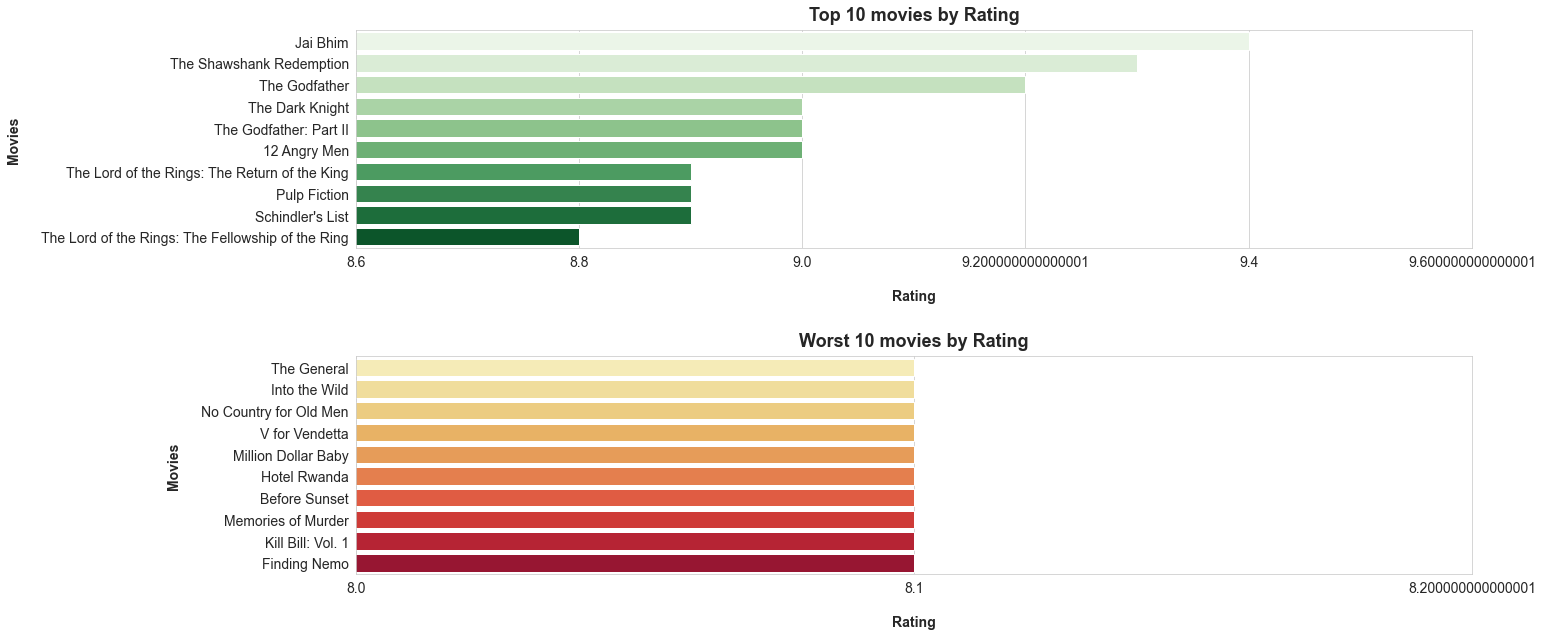

In [346]:
top_10_by_rating = movies[['Movie Name', 'Rating']].sort_values('Rating', ascending = False).head(10)
worst_10_by_rating = movies[['Movie Name', 'Rating']].sort_values('Rating').head(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

custom_palette = sns.color_palette("Paired", 9)
sns.set_style("whitegrid")

sns.barplot(ax = ax1, x = 'Rating', y = 'Movie Name', data = top_10_by_rating, palette = 'Greens')
ax1.set_title('Top 10 movies by Rating', loc = 'center', pad = 10, fontweight = 'bold', fontsize = 18)
ax1.set_xlabel('Rating', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax1.set_ylabel('Movies', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax1.set_xticks(np.arange(0, 10.5, 0.2))
ax1.set_xticklabels(np.arange(0, 10.5, 0.2), fontsize= 14)
ax1.set_yticks(range(0, 10))
ax1.set_yticklabels(top_10_by_rating['Movie Name'], fontsize= 14)
ax1.set_xlim(8.6, 9.6)


sns.barplot(ax = ax2, x = 'Rating', y = 'Movie Name', data = worst_10_by_rating, palette = 'YlOrRd')
ax2.set_title('Worst 10 movies by Rating', loc = 'center', pad = 10, fontweight = 'bold', fontsize = 18)
ax2.set_xlabel('Rating', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax2.set_ylabel('Movies', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax2.set_xticks(np.arange(0, 10.5, 0.1))
ax2.set_xticklabels(np.arange(0, 10.5, 0.1), fontsize= 14)
ax2.set_yticks(range(0, 10))
ax2.set_yticklabels(worst_10_by_rating['Movie Name'], fontsize= 14)
ax2.set_xlim(8, 8.2)

plt.subplots_adjust(hspace=0.5)

plt.show()

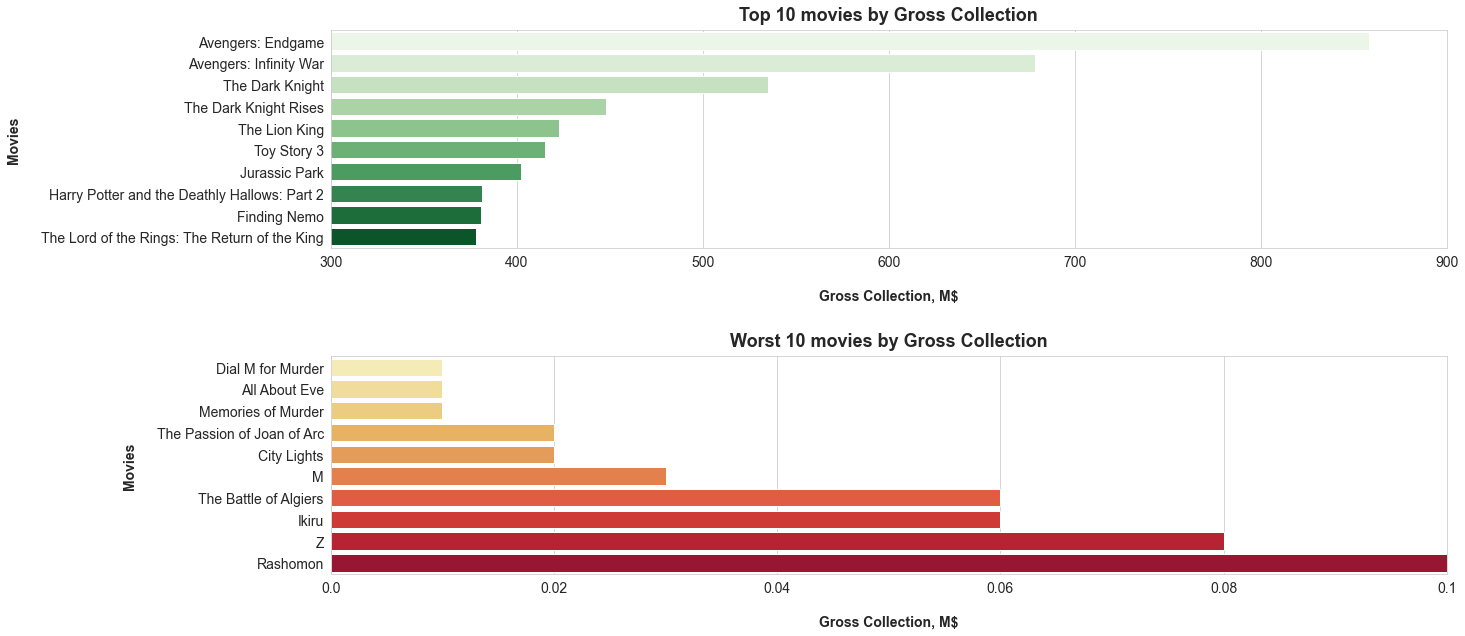

In [331]:
top_10_by_gross = movies[['Movie Name', 'Gross Collection']].sort_values('Gross Collection', ascending = False).head(10)
worst_10_by_gross = movies[['Movie Name', 'Gross Collection']].sort_values('Gross Collection').head(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

custom_palette = sns.color_palette("Paired", 9)
sns.set_style("whitegrid")

sns.barplot(ax = ax1, x = 'Gross Collection', y = 'Movie Name', data = top_10_by_gross, palette = 'Greens')
ax1.set_title('Top 10 movies by Gross Collection', loc = 'center', pad = 10, fontweight = 'bold', fontsize = 18)
ax1.set_xlabel('Gross Collection, M$', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax1.set_ylabel('Movies', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax1.set_xticks(range(0, 1000, 100))
ax1.set_xticklabels(range(0, 1000, 100), fontsize= 14)
ax1.set_yticks(range(0, 10))
ax1.set_yticklabels(top_10_by_gross['Movie Name'], fontsize= 14)
ax1.set_xlim(300, 900)


sns.barplot(ax = ax2, x = 'Gross Collection', y = 'Movie Name', data = worst_10_by_gross, palette = 'YlOrRd')
ax2.set_title('Worst 10 movies by Gross Collection', loc = 'center', pad = 10, fontweight = 'bold', fontsize = 18)
ax2.set_xlabel('Gross Collection, M$', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax2.set_ylabel('Movies', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax2.set_xticks(np.arange(0, 0.11, 0.02))
ax2.set_xticklabels(np.arange(0, 0.11, 0.02), fontsize= 14)
ax2.set_yticks(range(0, 10))
ax2.set_yticklabels(worst_10_by_gross['Movie Name'], fontsize= 14)

plt.subplots_adjust(hspace=0.5)

plt.show()

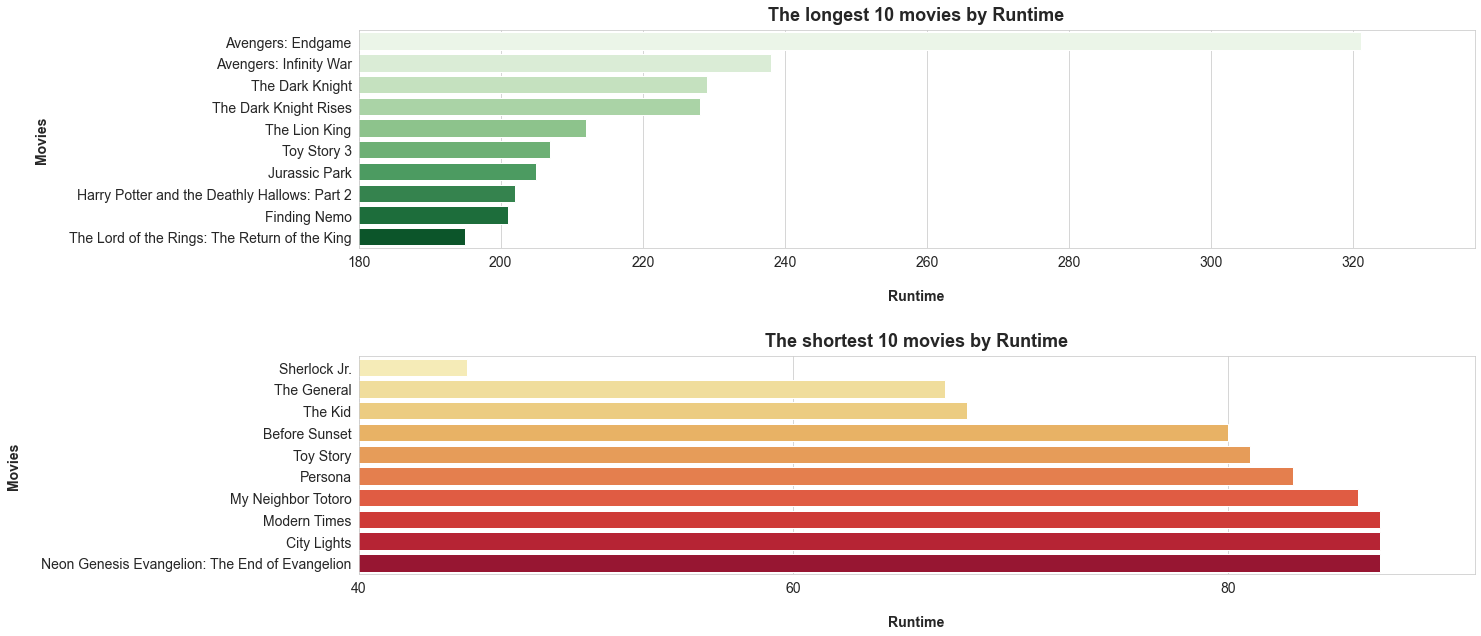

In [347]:
top_10_by_runtime = movies[['Movie Name', 'Runtime']].sort_values('Runtime', ascending = False).head(10)
short_10_by_runtime = movies[['Movie Name', 'Runtime']].sort_values('Runtime').head(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

custom_palette = sns.color_palette("Paired", 9)
sns.set_style("whitegrid")

sns.barplot(ax = ax1, x = 'Runtime', y = 'Movie Name', data = top_10_by_runtime, palette = 'Greens')
ax1.set_title('The longest 10 movies by Runtime', loc = 'center', pad = 10, fontweight = 'bold', fontsize = 18)
ax1.set_xlabel('Runtime', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax1.set_ylabel('Movies', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax1.set_xticks(range(0, 340, 20))
ax1.set_xticklabels(range(0, 340, 20), fontsize= 14)
ax1.set_yticks(range(0, 10))
ax1.set_yticklabels(top_10_by_gross['Movie Name'], fontsize= 14)
ax1.set_xlim(180,)


sns.barplot(ax = ax2, x = 'Runtime', y = 'Movie Name', data = short_10_by_runtime, palette = 'YlOrRd')
ax2.set_title('The shortest 10 movies by Runtime', loc = 'center', pad = 10, fontweight = 'bold', fontsize = 18)
ax2.set_xlabel('Runtime', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax2.set_ylabel('Movies', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax2.set_xticks(range(0, 100, 20))
ax2.set_xticklabels(range(0, 100, 20), fontsize= 14)
ax2.set_yticks(range(0, 10))
ax2.set_yticklabels(short_10_by_runtime['Movie Name'], fontsize= 14)
ax2.set_xlim(40,)

plt.subplots_adjust(hspace=0.5)

plt.show()

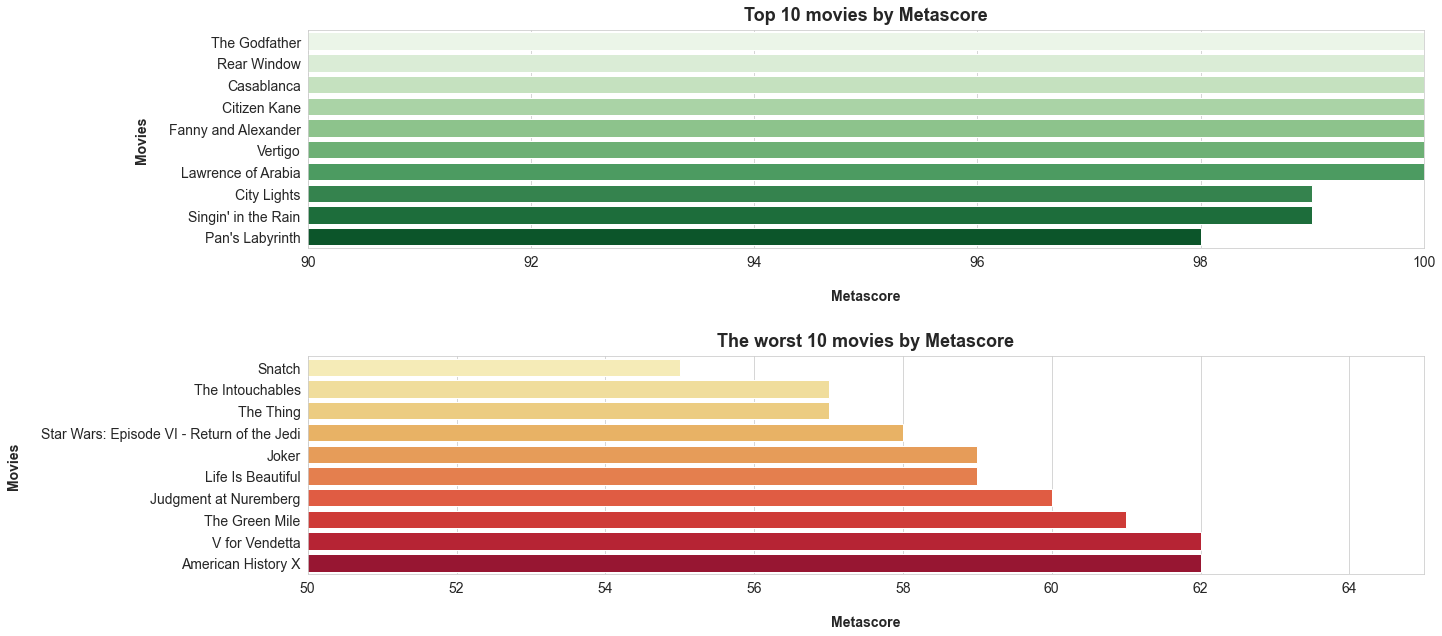

In [360]:
top_10_by_metascore = movies[['Movie Name', 'Metascore']].sort_values('Metascore', ascending = False).head(10)
worst_10_by_metascore = movies[['Movie Name', 'Metascore']].sort_values('Metascore').head(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

custom_palette = sns.color_palette("Paired", 9)
sns.set_style("whitegrid")

sns.barplot(ax = ax1, x = 'Metascore', y = 'Movie Name', data = top_10_by_metascore, palette = 'Greens')
ax1.set_title('Top 10 movies by Metascore', loc = 'center', pad = 10, fontweight = 'bold', fontsize = 18)
ax1.set_xlabel('Metascore', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax1.set_ylabel('Movies', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax1.set_xticks(range(0, 101, 2))
ax1.set_xticklabels(range(0, 101, 2), fontsize= 14)
ax1.set_yticks(range(0, 10))
ax1.set_yticklabels(top_10_by_metascore['Movie Name'], fontsize= 14)
ax1.set_xlim(90,100)


sns.barplot(ax = ax2, x = 'Metascore', y = 'Movie Name', data = worst_10_by_metascore, palette = 'YlOrRd')
ax2.set_title('The worst 10 movies by Metascore', loc = 'center', pad = 10, fontweight = 'bold', fontsize = 18)
ax2.set_xlabel('Metascore', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax2.set_ylabel('Movies', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax2.set_xticks(range(0, 101, 2))
ax2.set_xticklabels(range(0, 101, 2), fontsize= 14)
ax2.set_yticks(range(0, 10))
ax2.set_yticklabels(worst_10_by_metascore['Movie Name'], fontsize= 14)
ax2.set_xlim(50,65)

plt.subplots_adjust(hspace=0.5)

plt.show()

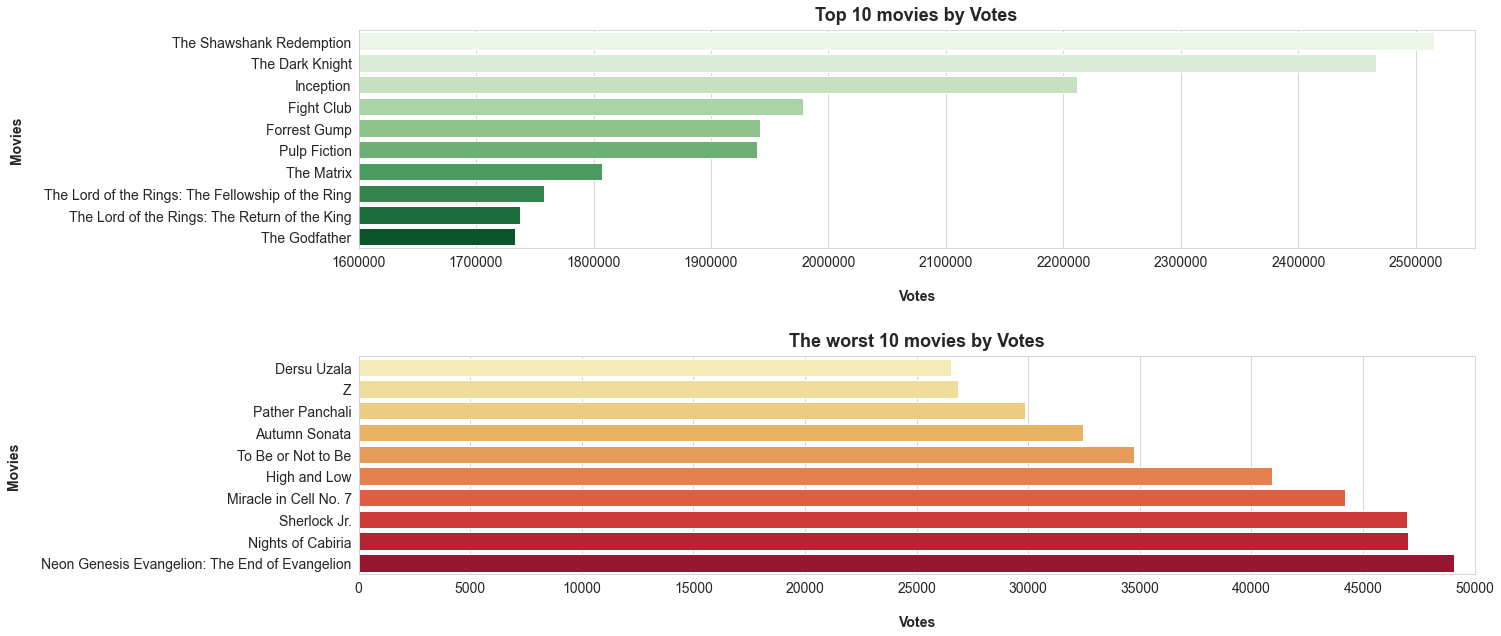

In [370]:
top_10_by_votes = movies[['Movie Name', 'Votes']].sort_values('Votes', ascending = False).head(10)
worst_10_by_votes = movies[['Movie Name', 'Votes']].sort_values('Votes').head(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

custom_palette = sns.color_palette("Paired", 9)
sns.set_style("whitegrid")

sns.barplot(ax = ax1, x = 'Votes', y = 'Movie Name', data = top_10_by_votes, palette = 'Greens')
ax1.set_title('Top 10 movies by Votes', loc = 'center', pad = 10, fontweight = 'bold', fontsize = 18)
ax1.set_xlabel('Votes', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax1.set_ylabel('Movies', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax1.set_xticks(range(0, 2600000, 100000))
ax1.set_xticklabels(range(0, 2600000, 100000), fontsize= 14)
ax1.set_yticks(range(0, 10))
ax1.set_yticklabels(top_10_by_votes['Movie Name'], fontsize= 14)
ax1.set_xlim(1600000,2550000)


sns.barplot(ax = ax2, x = 'Votes', y = 'Movie Name', data = worst_10_by_votes, palette = 'YlOrRd')
ax2.set_title('The worst 10 movies by Votes', loc = 'center', pad = 10, fontweight = 'bold', fontsize = 18)
ax2.set_xlabel('Votes', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax2.set_ylabel('Movies', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax2.set_xticks(range(0, 2600000, 5000))
ax2.set_xticklabels(range(0, 2600000, 5000), fontsize= 14)
ax2.set_yticks(range(0, 10))
ax2.set_yticklabels(worst_10_by_votes['Movie Name'], fontsize= 14)
ax2.set_xlim(0,50000)

plt.subplots_adjust(hspace=0.5)

plt.show()

In [373]:
movies_corr = movies[['Runtime', 'Rating', 'Votes', 'Metascore', 'Gross Collection']].corr()
movies_corr

,Runtime,Rating,Votes,Metascore,Gross Collection
Runtime,1.000000,0.230869,0.171562,-0.007222,0.124132
Rating,0.230869,1.000000,0.556386,0.074542,0.189227
Votes,0.171562,0.556386,1.000000,-0.219864,0.520482
Metascore,-0.007222,0.074542,-0.219864,1.000000,-0.112479
Gross Collection,0.124132,0.189227,0.520482,-0.112479,1.000000


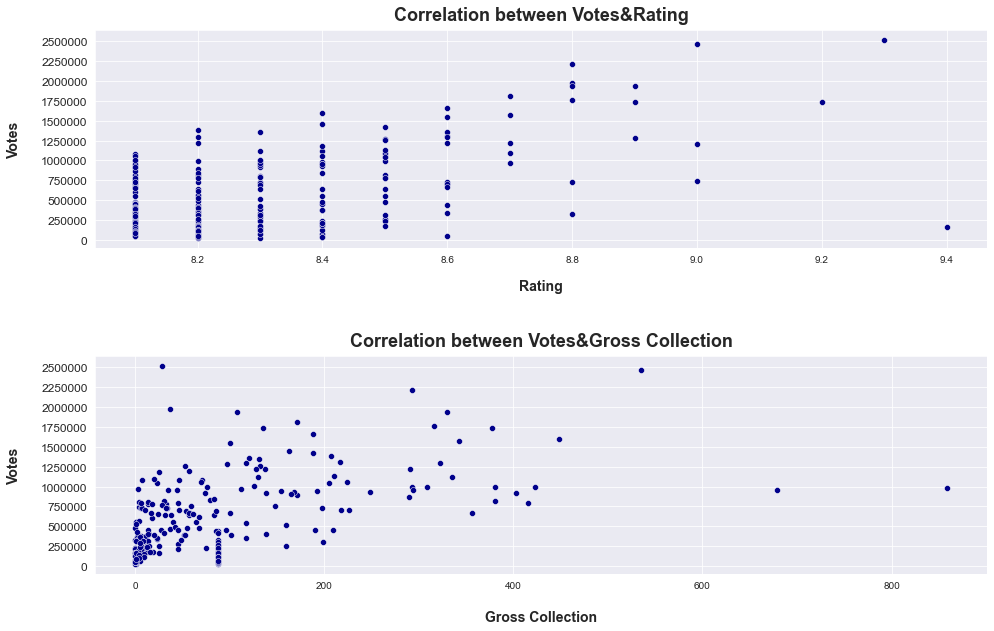

In [418]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

sns.set_style("darkgrid")

sns.scatterplot(ax = ax1, y = 'Votes', x = 'Rating', data = movies, c = ['darkblue'])
ax1.set_title('Correlation between Votes&Rating', loc = 'center', pad = 10, fontweight = 'bold', fontsize = 18)
ax1.set_xlabel('Rating', fontsize = 14, labelpad = 15, fontweight = 'bold')
ax1.set_ylabel('Votes', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax1.set_yticks(range(0, 2500001, 250000))
ax1.set_yticklabels(range(0, 2500001, 250000), fontsize= 12)


sns.scatterplot(ax = ax2, y = 'Votes', x = 'Gross Collection', data = movies, c = ['darkblue'])
ax2.set_title('Correlation between Votes&Gross Collection', loc = 'center', pad = 10, fontweight = 'bold', fontsize = 18)
ax2.set_xlabel('Gross Collection', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax2.set_ylabel('Votes', fontsize = 14, labelpad = 20, fontweight = 'bold')
ax2.set_yticks(range(0, 2500001, 250000))
ax2.set_yticklabels(range(0, 2500001, 250000), fontsize= 12)

plt.subplots_adjust(hspace=0.5)

plt.show()

In [509]:
movies = movies.drop(columns = ['Ranking Of Movie'], axis = 1)
movies['Decade'] = movies['Year'].astype(int).apply(lambda x: '1920s' if 1920<=x<=1929 else ('1930s' if 1930<=x<=1939 else ('1940s' if 1940<=x<=1949 else ('1950s' if 1950<=x<=1959 else ('1960s' if 1960<=x<=1969 else ('1970s' if 1970<=x<=1979 else ('1980s' if 1980<=x<=1989 else ('1990s' if 1990<=x<=1999 else ('2000s' if 2000<=x<=2009 else ('2010s' if 2010<=x<=2019 else '2020s'))))))))))
group_by_decade_sum = movies.groupby('Decade').sum().reset_index()
group_by_decade_mean = movies.groupby('Decade').mean().reset_index()

In [510]:
group_by_decade_mean

,Decade,Runtime,Rating,Votes,Metascore,Gross Collection
0,1920s,90.333333,8.200000,97615.000000,85.041667,2.361667
1,1930s,124.166667,8.266667,180066.333333,89.075000,35.475000
2,1940s,112.000000,8.300000,239337.300000,91.590000,19.435000
3,1950s,123.333333,8.287500,207572.375000,89.839583,35.211667
4,1960s,142.631579,8.300000,250152.526316,86.994737,38.651053
5,1970s,136.894737,8.347368,583950.631579,86.123684,80.570000
6,1980s,132.758621,8.255172,505926.448276,80.084483,79.458966
7,1990s,126.925000,8.400000,941419.250000,77.858750,101.150500
8,2000s,129.326087,8.300000,804177.369565,80.473913,105.837174
9,2010s,135.173913,8.256522,637505.065217,79.616304,146.935000


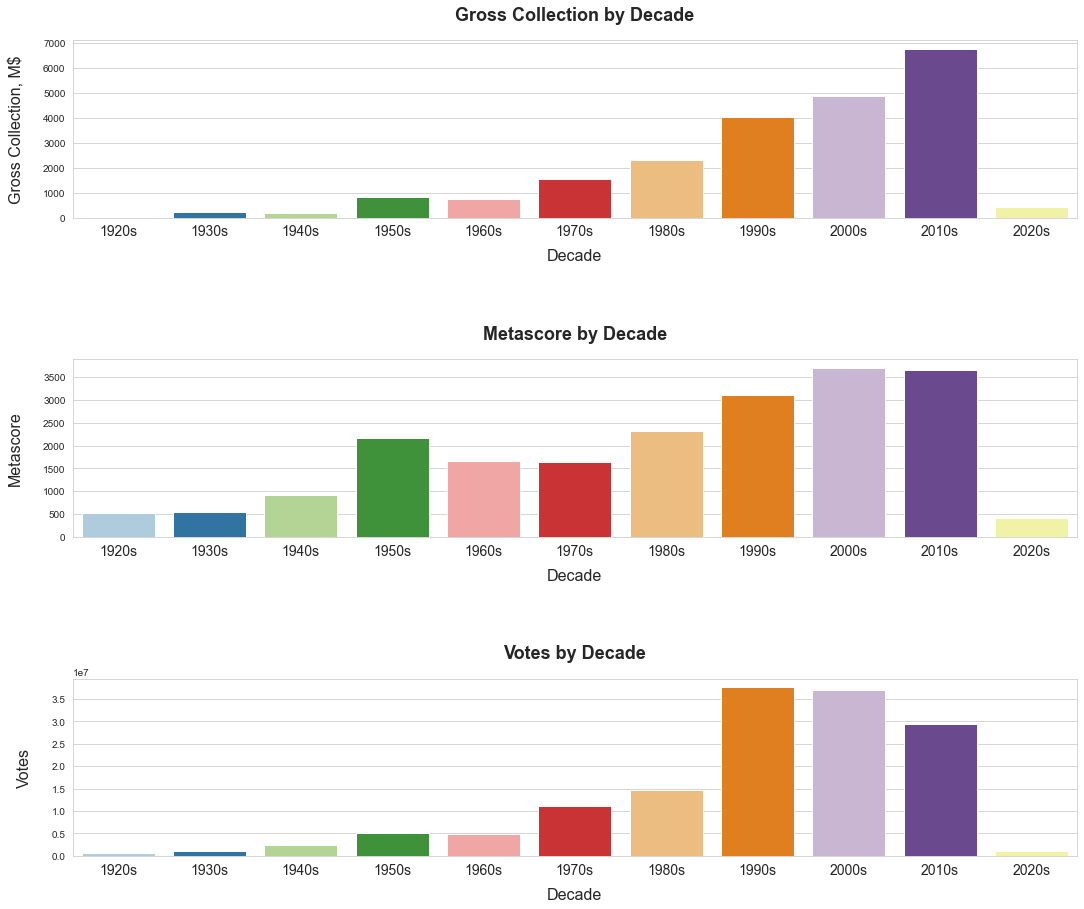

In [512]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (18, 15))

sns.set_style("whitegrid")

sns.barplot(ax = ax1, data = group_by_decade_sum, x = 'Decade', y = 'Gross Collection', palette = 'Paired')
ax1.set_xticks(range(len(group_by_decade_sum['Decade'])))
ax1.set_xticklabels(group_by_decade_sum['Decade'], fontsize = 14)
ax1.set_xlabel('Decade', fontsize = 16, labelpad = 10)
ax1.set_ylabel('Gross Collection, M$', fontsize = 16, labelpad = 20)
ax1.set_title('Gross Collection by Decade', fontsize = 18, pad = 20, fontweight = 'bold')


sns.barplot(ax = ax2, data = group_by_decade_sum, x = 'Decade', y = 'Metascore', palette = 'Paired')
ax2.set_xticks(range(len(group_by_decade_sum['Decade'])))
ax2.set_xticklabels(group_by_decade_sum['Decade'], fontsize = 14)
ax2.set_xlabel('Decade', fontsize = 16, labelpad = 10)
ax2.set_ylabel('Metascore', fontsize = 16, labelpad = 20)
ax2.set_title('Metascore by Decade', fontsize = 18, pad = 20, fontweight = 'bold')


sns.barplot(ax = ax3, data = group_by_decade_sum, x = 'Decade', y = 'Votes', palette = 'Paired')
ax3.set_xticks(range(len(group_by_decade_sum['Decade'])))
ax3.set_xticklabels(group_by_decade_sum['Decade'], fontsize = 14)
ax3.set_xlabel('Decade', fontsize = 16, labelpad = 10)
ax3.set_ylabel('Votes', fontsize = 16, labelpad = 20)
ax3.set_title('Votes by Decade', fontsize = 18, pad = 20, fontweight = 'bold')

plt.subplots_adjust(hspace=0.8)

plt.show()

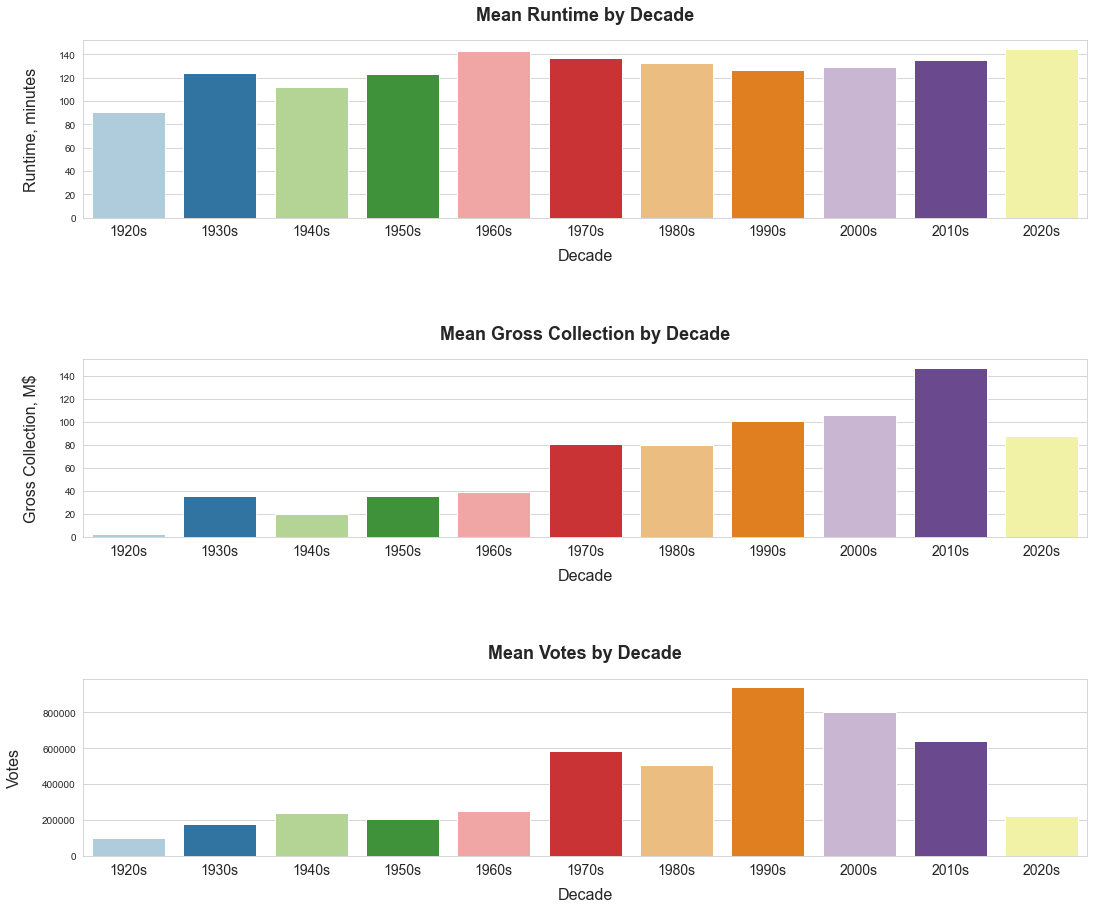

In [513]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (18, 15))

sns.set_style("whitegrid")

sns.barplot(ax = ax1, data = group_by_decade_mean, x = 'Decade', y = 'Runtime', palette = 'Paired')
ax1.set_xticks(range(len(group_by_decade_mean['Decade'])))
ax1.set_xticklabels(group_by_decade_mean['Decade'], fontsize = 14)
ax1.set_xlabel('Decade', fontsize = 16, labelpad = 10)
ax1.set_ylabel('Runtime, minutes', fontsize = 16, labelpad = 20)
ax1.set_title('Mean Runtime by Decade', fontsize = 18, pad = 20, fontweight = 'bold')


sns.barplot(ax = ax2, data = group_by_decade_mean, x = 'Decade', y = 'Gross Collection', palette = 'Paired')
ax2.set_xticks(range(len(group_by_decade_mean['Decade'])))
ax2.set_xticklabels(group_by_decade_mean['Decade'], fontsize = 14)
ax2.set_xlabel('Decade', fontsize = 16, labelpad = 10)
ax2.set_ylabel('Gross Collection, M$', fontsize = 16, labelpad = 20)
ax2.set_title('Mean Gross Collection by Decade', fontsize = 18, pad = 20, fontweight = 'bold')


sns.barplot(ax = ax3, data = group_by_decade_mean, x = 'Decade', y = 'Votes', palette = 'Paired')
ax3.set_xticks(range(len(group_by_decade_mean['Decade'])))
ax3.set_xticklabels(group_by_decade_mean['Decade'], fontsize = 14)
ax3.set_xlabel('Decade', fontsize = 16, labelpad = 10)
ax3.set_ylabel('Votes', fontsize = 16, labelpad = 20)
ax3.set_title('Mean Votes by Decade', fontsize = 18, pad = 20, fontweight = 'bold')

plt.subplots_adjust(hspace=0.8)

plt.show()